# House Price Prediction

We have a dataset of 1460 rows and 81 features which has details of different houses, their sizes, amenities etc. and the target is Sale Price of that house. This is a kaggle challenge that can be found at : https://www.kaggle.com/c/house-prices-advanced-regression-techniques.


I am preparing this solution in a way that is very friendly to the reader. I will be giving comments describing what we are doing and also give reason for the same.

The entire solution will be divided into various sections, such as:
1. Exploratory Data Analysis
2. Data Preprocessing
3. Feature Selection
4. Model Building
5. Model Evaluation
6. Saving Model
7. Model Execution (Running it on Unseen Data)

Let's get started...

In [26]:
#Importing libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Data Analysis

First we will to preliminary investigation such as number or rows, columns, datatype and have a look at the head of the data.

In [32]:
train_set = pd.read_csv('train.csv')

In [33]:
train_set.shape

(1460, 81)

Number of rows = 1460 and Number of features = 81

A preview of the Data set:

In [34]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Here we observe that most of the features are categorical. You can check out the Data set description on the Kaggle page in the link given at the top.

In [35]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [36]:
#Setting seaborn style
sns.set_style("dark")

Let us visualize the distribution of the target variable i.e sale Price.

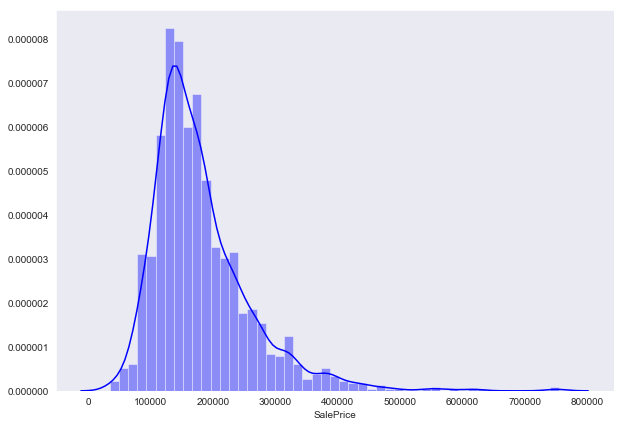

In [37]:
fig, ax = plt.subplots(figsize=(10,7)) #setting plot size
sns.distplot(train_set['SalePrice'], color = 'blue')

Here, we observe that data is right skewed.

To verify mathematically, what is the magnitude of the skew we use this stats method:

In [38]:
print(stats.skew(train_set['SalePrice']))

1.880940746034036


If skewness value lies above +1 or below -1, data is highly skewed. 
If it lies between +0.5 to -0.5, it is moderately skewed. 
If the value is 0, then the data is symmetric.

We can therefore, infer that the target is highly right skewed.

For regression to work with greater accuracy we should convert the target into a normal distribution. We have few techniques to do that.

If the data is right skewed (positive skew), we can use:
1. square root transformation
2. cube root transformation
3. log transformation

If the data is left skewed (negative skew), we can use:
1. Square transformation
2. cube root transformation
3. logarithmic transformation

In [39]:
#Natural log transform to convert target into normally distributed:
train_set['SalePrice'] = np.log1p(train_set['SalePrice'])

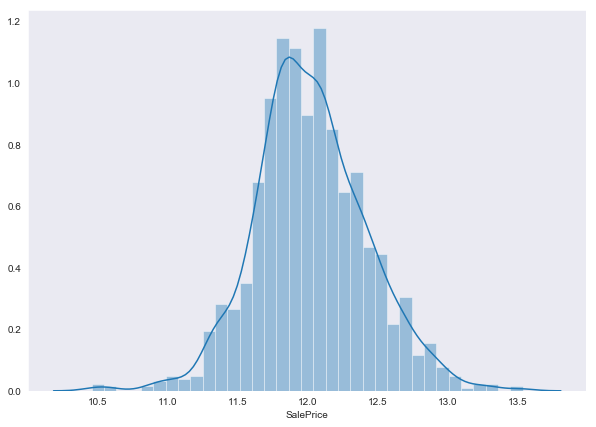

In [40]:
#verifying visually
fig, ax = plt.subplots(figsize=(10,7)) #setting plot size
sns.distplot(train_set['SalePrice'])

In [11]:
#verifying mathematically
print(stats.skew(train_set['SalePrice']))

0.12122191311528363


#### Missing Values 

In [41]:
#capturing columns that have atleast 1 null value
train_null = train_set[train_set.columns[train_set.isnull().any()]] 

In [42]:
train_null.shape

(1460, 19)

So, out of 81 features, there are 19 features where there is at least 1 null value.

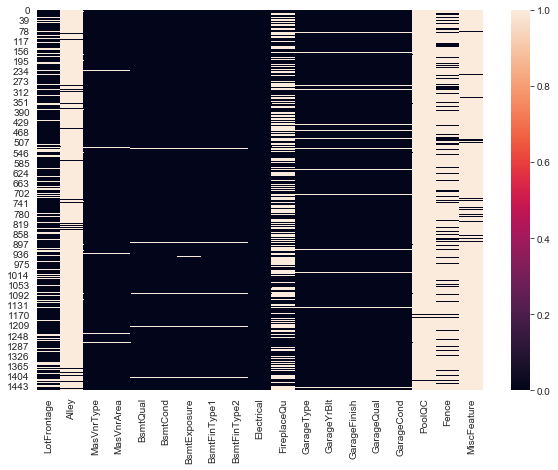

In [43]:
#Verifying null values visually
fig, ax = plt.subplots(figsize=(10,7)) #setting plot size
sns.heatmap(train_null.isnull())

Here, we observe that Alley,PoolQC,MiscFeature are almost having null values only. Let's see the count of null values in these columns:

In [44]:
print(train_null.isnull().sum().sort_values(ascending = False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [45]:
#plotting the above details
#first saving the above details in a dataset
train_null_count = pd.DataFrame(train_null.isnull().sum().sort_values(ascending = False)) 
print(train_null_count)

                 0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageYrBlt     81
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1


In [46]:
#The column name becomes the index, so we convert the index into a column like this
train_null_count = train_null_count.reset_index()
train_null_count.rename(columns = {"index":"Features",0:"Count_Null"}, inplace = True)    #renaming datframe columns
print(train_null_count)

        Features  Count_Null
0         PoolQC        1453
1    MiscFeature        1406
2          Alley        1369
3          Fence        1179
4    FireplaceQu         690
5    LotFrontage         259
6    GarageYrBlt          81
7     GarageType          81
8   GarageFinish          81
9     GarageQual          81
10    GarageCond          81
11  BsmtFinType2          38
12  BsmtExposure          38
13  BsmtFinType1          37
14      BsmtCond          37
15      BsmtQual          37
16    MasVnrArea           8
17    MasVnrType           8
18    Electrical           1


#### Correlation 

Let's observe the correlation among each features, and also with the target.

In [47]:
corr = train_set.corr()

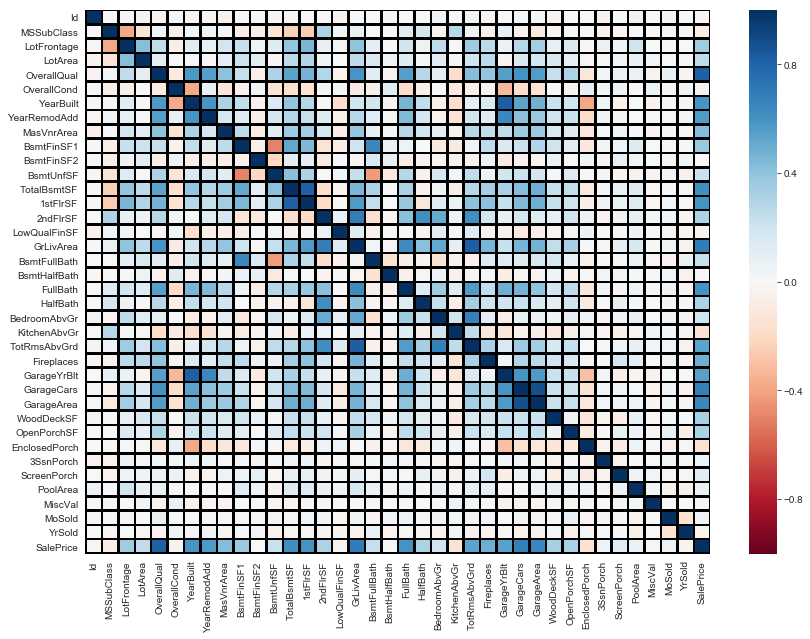

In [48]:
fig, ax = plt.subplots(figsize=(14,10)) #setting plot size
sns.heatmap(corr, linewidths = 1.5, linecolor = 'Black', cmap = 'RdBu', vmin = -1.0, vmax = 1.0)
#linewidth - gives a grid
#linecolor - grid in black
#cmap - 'RdBu' - Blue is for positive correlation and Red is for negative correlation
#vmin and vmax sets the range for color gradation, we want it through -1 and +1
#else the range is based on min and max correlation the the dataset

There are plenty of features here. Let's focus on features that have high correlation with the target.

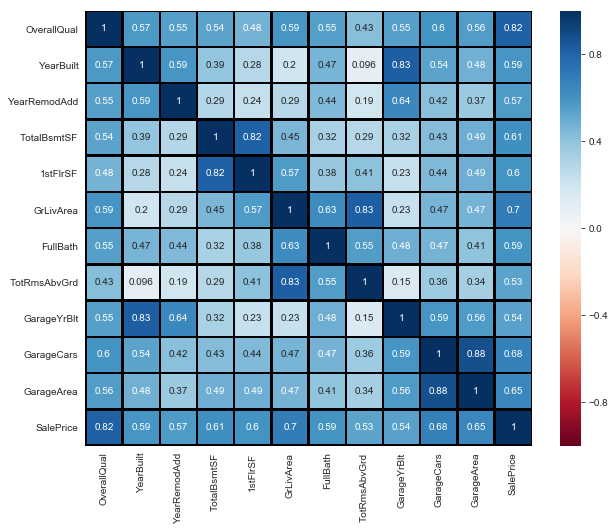

In [53]:
#finding features that have high correlation with target
fig, ax = plt.subplots(figsize=(10,8)) #setting plot size
features = corr.index[abs(corr['SalePrice']) > 0.5 ] #absolute ensures negative correlation is also accounted.
sns.heatmap(train_set[features].corr(),linewidths = 1.5, linecolor = 'Black', cmap = 'RdBu', vmin = -1.0, vmax = 1.0, annot = True)

"OverallQual" has the highest correlation with SalePrice - 0.82

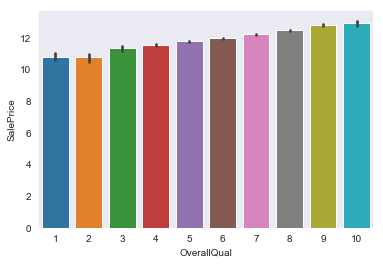

In [55]:
#Let's plot OverallQual with target
sns.barplot(train_set['OverallQual'],train_set['SalePrice'])

Here we can see that as "OverallQual" is increasing, SalePrice is also linearly increasing.

Let's observe the pairplot of features with high correlation with the target:

C:\Users\StarTrek\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\StarTrek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\StarTrek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


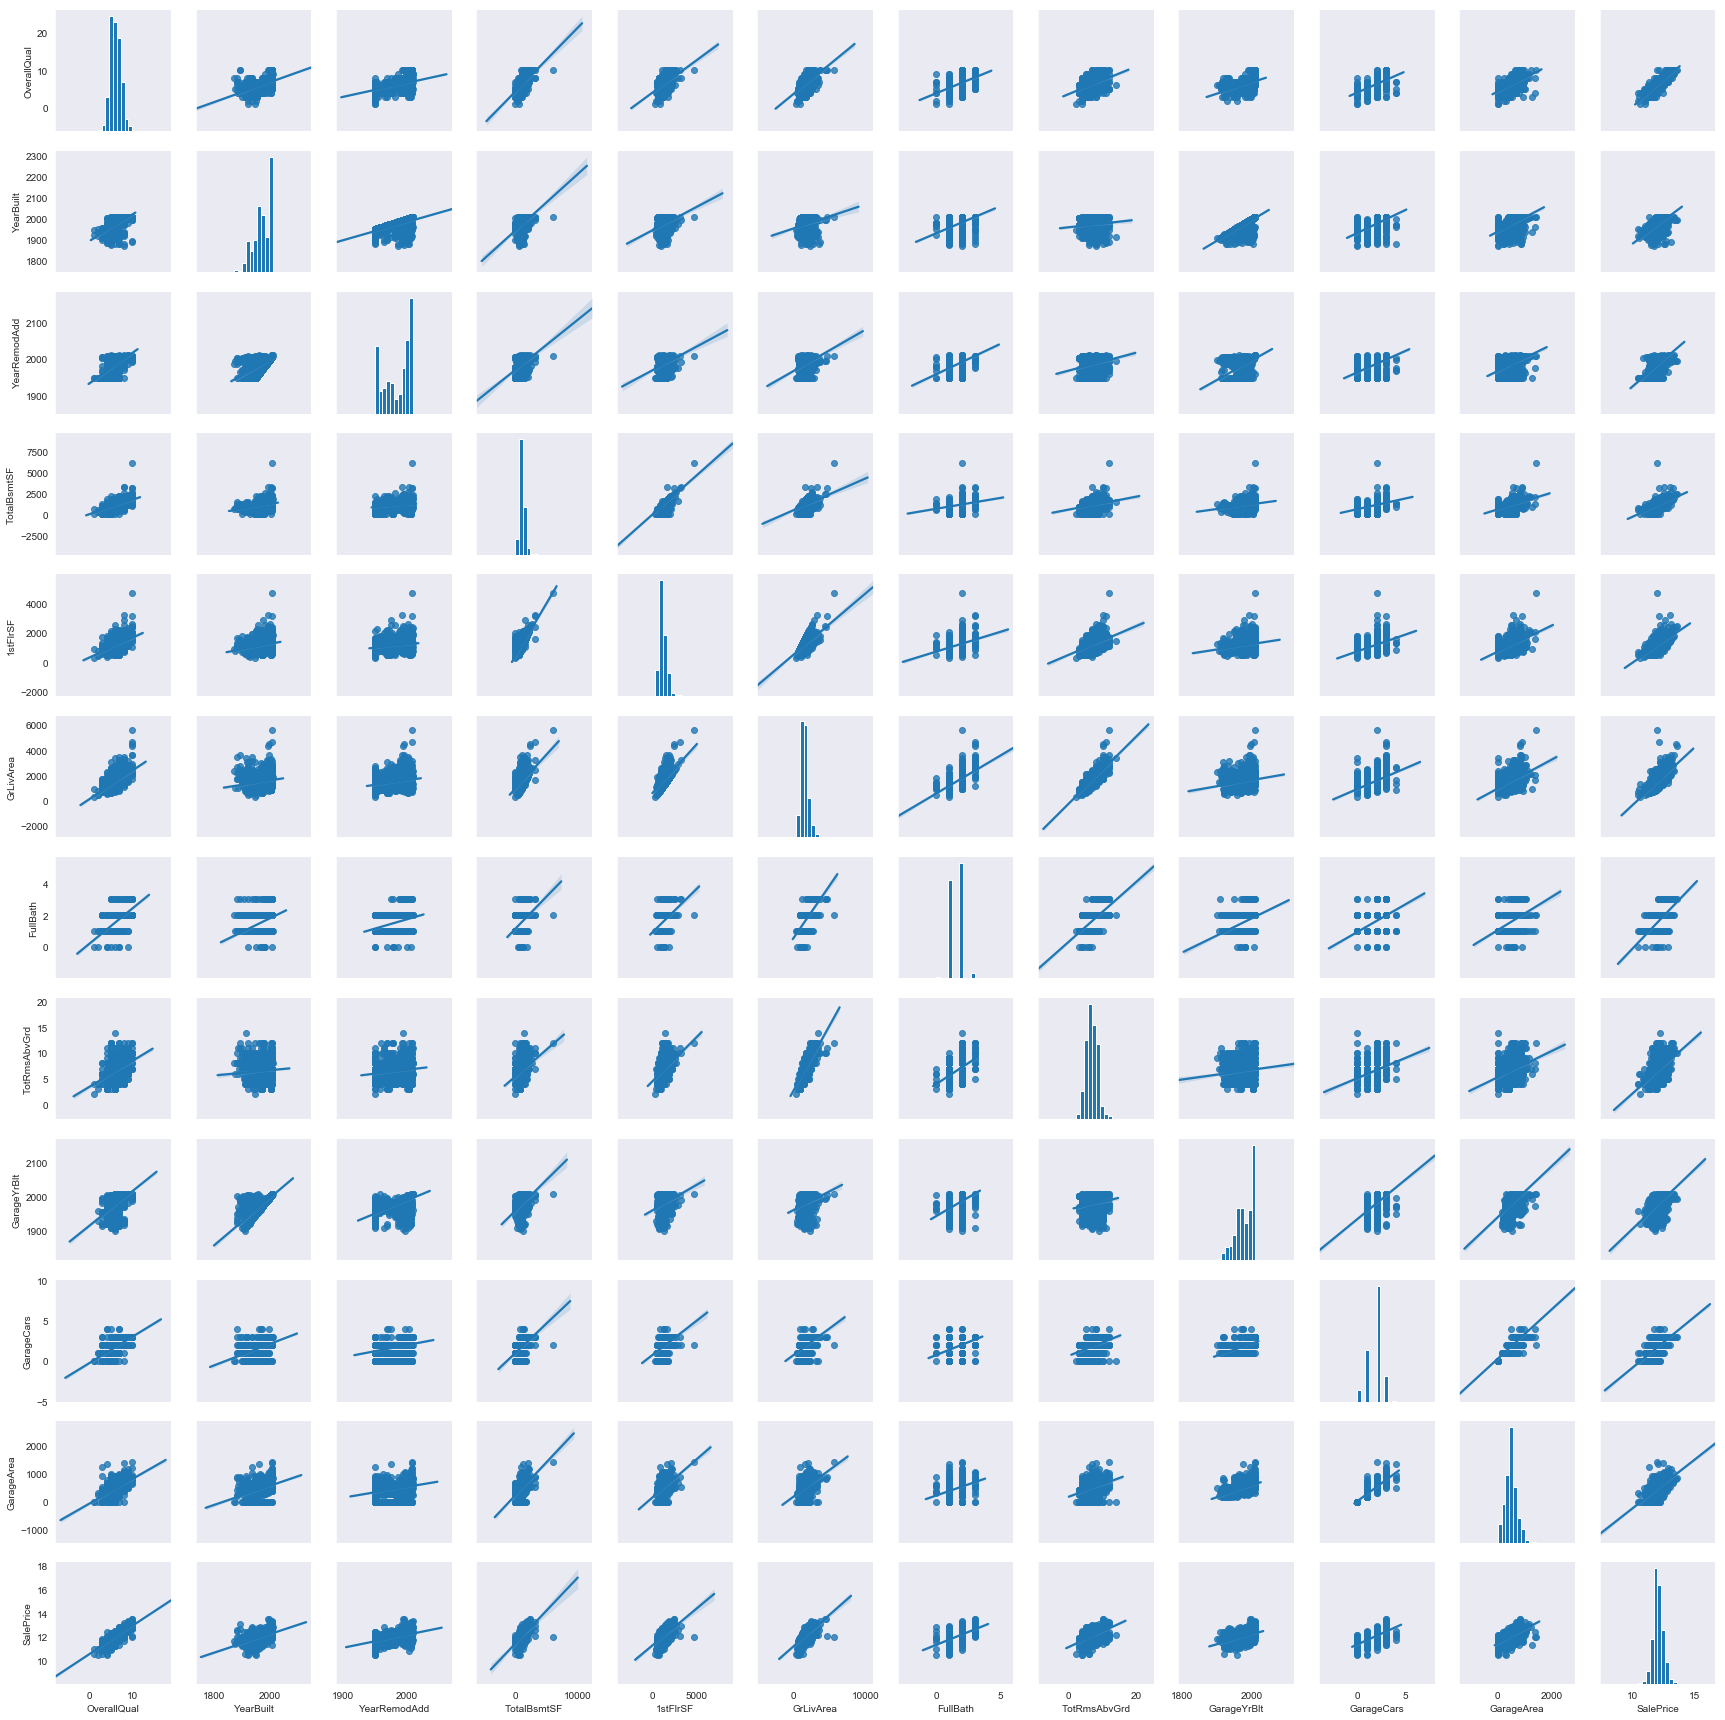

In [56]:
sns.pairplot(train_set[features], kind = 'reg', size = 2)

Here, you can see the linear relationships.

### Data Pre-processing 

We will now prepare the data that is suitable for building the model.

#### Treating missing values 

We cannot simply eliminate column or rows where there are NA values because whereever there are NA values, it signifies that that amenity is not present. Therefore, missingness is actually a feature.
eg: PoolQC is NA, the Pool does not exist.

Also, most of these data are categorical therefore we will substitue NA with 
'None' signifying that feature is not present.

In [57]:
#'None' to null values under categorical features.
for x in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','MasVnrType','Utilities']:
    train_set[x] = train_set[x].fillna('None')

In [58]:
#median value under "LotFrontage".
train_set['LotFrontage'] = train_set.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [59]:
#0 under counts/year
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea']:
    train_set[col] = train_set[col].fillna(int(0))

In [60]:
#mode for electrical
train_set['Electrical'] = train_set['Electrical'].fillna(train_set['Electrical']).mode()[0]

Let's check for missingness:

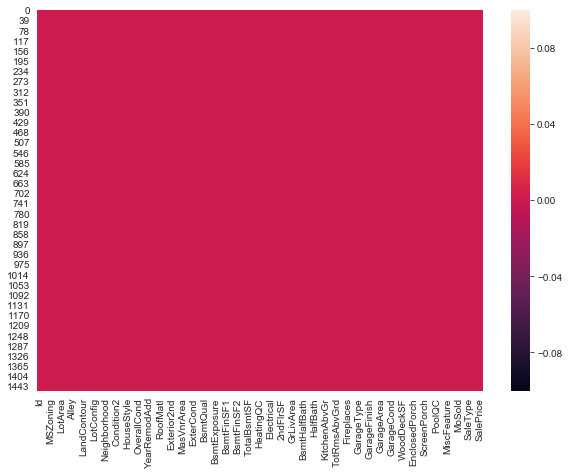

In [62]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_set.isnull())

No missing values.

#### Removing unnecessary features 

ID number will not contribute to prediction and there is just one value under column Utilities i.e. AllPub.

In [63]:
train_set = train_set.drop(['Id'], axis = 1)
train_set = train_set.drop(['Utilities'], axis = 1)

#outlier check  -  
Almost all the features are categorical, even the int64 columns are categorical as they actually signify a quality. Check data set description on Kaggle page (link given on top).



#Normalization or standardization  -  
Again, this cannot be done due to categorical nature of features.

#### Label Encoding

In [65]:
#All categorical features
features = ('Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'FireplaceQu','BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'Neighborhood',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating', 'OverallCond')

In [66]:
from sklearn.preprocessing import LabelEncoder
for i in features:
    le = LabelEncoder()
    train_set[i] = le.fit_transform(train_set[i])

In [67]:
train_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,1,3,3,4,0,...,0,3,4,1,0,1,2,8,4,12.247699
1,0,3,80.0,9600,1,1,3,3,2,0,...,0,3,4,1,0,4,1,8,4,12.109016
2,5,3,68.0,11250,1,1,0,3,4,0,...,0,3,4,1,0,8,2,8,4,12.317171
3,6,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,1,0,8,0,11.849405
4,5,3,84.0,14260,1,1,0,3,2,0,...,0,3,4,1,0,11,2,8,4,12.429220


Categorical features are replaced with numbers.

#Dummy variable  -  
We are not going to use 'OneHotEncoding' on above LabelEncoded data because there are plenty of features which are categorical in nature and OHE will blowup the feature space.

#### X and y | Train-Test Split  

In [95]:
#sklearn works only with numpy array, so using '.values' method on dataframes.
y  = train_set['SalePrice'].values
X = train_set.iloc[:,:-1].values

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Selection 

We will be using Backward Elimination technique.

#### Backward Elimination technique 

We will make use of 'statsmodels', as it allows use to measure the quality of the model (R- square) and more importantly tells us the significance of each features (p values).

'statsmodels' does not have provision for the intercept (b0) in the linear equation:    
y = b0 + b1x1 +b2x2 ....    
we have added a column of ones for b0 (i.e. intercept)

In [71]:
X_train.shape

(1168, 78)

In [97]:
x = np.append(arr = np.ones((X_train.shape[0],1)).astype(int),values = X_train, axis = 1)

Staring with backward elimination.

In [98]:
x_opt = x[:,:] #all columns for first round of backward elimination

In [99]:
#Building OLS model - Ordinary Least Squares
import statsmodels.formula.api as sm
regressor_opt = sm.OLS(endog = y_train, exog = x_opt).fit()
#endog = target variables, exog = predictor variables

Let's look at all the important details that 'statsmodels' gives us about the model:

In [77]:
regressor_opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:20:27   Log-Likelihood:                 677.93
No. Observations:                1168   AIC:                            -1204.
Df Residuals:                    1092   BIC:                            -819.1
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0815      0.856      8.274      0.000       5.402       8.761
x1             0.0010      0.002      0.427      0.669      -0.004       0.006
x2            -0.0138      0.008     -1.767      0.077      -0.029       0.002
x3            -0.0005      0.000     -1.920      0.055      -0.001    1.04e-05
x4          6.055e-07   7.81e-07      0.775      0.439   -9.28e-07    2.14e-06
x5             0.0410      0.072      0.571      0.568      -0.100       0.182
x6             0.0493      0.018      2.763      0.006       0.014       0.084
x7            -0.0058      0.003     -1.749      0.081      -0.012       0.001
x8             0.0075      0.006      1.173      0.241      -0.005       0.020
x9            -0.0017      0.003     -0.640      0.522      -0.007       0.004
x10            0.0463      0.019      2.474      0.014       0.010       0.083
x11            0.0009      0.001      1.182      0.238      -0.001       0.002
x12           -0.0041      0.005     -0.830      0.406      -0.014       0.006
x13           -0.0458      0.015     -2.986      0.003      -0.076      -0.016
x14           -0.0268      0.008     -3.516      0.000      -0.042      -0.012
x15           -0.0075      0.003     -2.221      0.027      -0.014      -0.001
x16            0.0686      0.006     11.515      0.000       0.057       0.080
x17            0.0385      0.005      7.455      0.000       0.028       0.049
x18            0.0013      0.000      3.509      0.000       0.001       0.002
x19            0.0007      0.000      2.044      0.041    2.69e-05       0.001
x20            0.0077      0.006      1.347      0.178      -0.004       0.019
x21            0.0215      0.008      2.700      0.007       0.006       0.037
x22           -0.0040      0.003     -1.546      0.122      -0.009       0.001
x23            0.0032      0.002      1.375      0.169      -0.001       0.008
x24            0.0019      0.008      0.231      0.818      -0.014       0.018
x25         4.596e-05   6.26e-05      0.734      0.463   -7.69e-05       0.000
x26           -0.0067      0.010     -0.688      0.492      -0.026       0.012
x27            0.0078      0.006      1.233      0.218      -0.005       0.020
x28            0.0155      0.008      1.862      0.063      -0.001       0.032
x29           -0.0121      0.005     -2.353      0.019      -0.022      -0.002
x30            0.0075      0.005      1.522      0.128      -0.002       0.017
x31           -0.0095      0.004     -2.128      0.034      -0.018      -0.001
x32           -0.0088      0.003     -3.408      0.001      -0.014      -0.004
x33        -2.201e-05   1.44e-05     -1.525      0.127   -5.03e-05     6.3e-06
x34            0.0116      0.005      2.190      0.029       0.001       0.022
x35         6.676e-05   2.94e-05      2.274      0.023    9.16e-06       0.000
x3

In [100]:
#Adjusted R-Squared
#initializing previous adj R squared to 0
adjr2_1 = 0 
#calculating new adj R squared from R squared
adjr2_2 = round(1 - (1-regressor_opt.rsquared)*((x_opt.shape[0] - 1) / (x_opt.shape[0] -(x_opt.shape[1]+1))),3)

In [79]:
print(adjr2_2)

0.878


In backward elimination we:
1. Remove the feature that has maximum p value(least significant), given it is not less than 5%(generally) significance level. 
2. Build the model again
3. Check if the adj r-squared is not reduced.
4. repeat

We can do this manually, but it will increase the length of our code, and also is prone to manual errors. Therefor here is well explained automated backward elimination code:

In [101]:
#----------automatic backward elimination--------------

column_index = np.arange(0, x_opt.shape[1]) #recording the current state of column index.

#Significance level = 5%

#L1 - loop for as many times as many columns
for j in range(1,len(regressor_opt.pvalues)):
    
    #L2 - loop for Finding the highest p value column
    for i in range(1,len(regressor_opt.pvalues)): #1 to ensure constant added above is not removed
        
        #ensuring that p value is >= 0.05
        if (regressor_opt.pvalues[i] == max(regressor_opt.pvalues)) and (max(regressor_opt.pvalues) >= 0.05): #significance level 5%  
            
            #create linear regression model without the highest p value column i.e input - np.delete(x_opt,i, axis = 1)
            regressor_opt = sm.OLS(endog = y_train, exog = np.delete(x_opt,i, axis = 1)).fit()
            
            #recording the previous adjusted R squared (for first round = 0)
            adjr2_1 = adjr2_2
            
            #calculating the new adjusted R squared
            adjr2_2 = round(1 - (1-regressor_opt.rsquared)*((np.delete(x_opt,i, axis = 1).shape[0] - 1) / (np.delete(x_opt,i, axis = 1).shape[0] -(np.delete(x_opt,i, axis = 1).shape[1]+1))),3)
            
            #Determining that removal of feature is not hampering prediction
            if adjr2_2 >= adjr2_1:  
                
                #permanently removing the column
                x_opt = np.delete(x_opt,i, axis = 1) 
                
                #recording the columns left after elimination
                column_index = np.delete(column_index,i)
            
            #giving control back to L1 - break when max pvalue column found
            break

In [102]:
x_opt.shape

(1168, 35)

Here, we see that a number of features have been removed.

In [103]:
#removing the iintercept we added at ref1
x_opt = x_opt[:,1:]

In [104]:
#since we added intercept, all columns index were +1
column_index = column_index - 1 

#removing intercept column from index
column_index = column_index[1:] 

In [105]:
#view eliminated columns
eliminated_columns = []
all_columns = pd.Series(train_set.iloc[:,:-1].columns)
for i in all_columns.index:      #do not confuse between "all_columns.index" and  "column_index"
    if i not in column_index:
        eliminated_columns.append(all_columns[i])
#following features were eleminated after Backward elimination technique
print(eliminated_columns)


['MSSubClass', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType']


The above columns were eliiminated in backward elimination.

In [106]:
print(regressor_opt.params) #model coefficients

[ 6.37335883e+00 -2.55211287e-02 -8.38687094e-04  2.15227858e-06
  2.36220258e-01 -6.99816410e-03 -2.37466673e-02  6.92540608e-02
  4.37008972e-02  1.71060070e-03  1.16321388e-02 -1.96210153e-02
 -1.26371815e-02 -7.15892640e-03  3.84977714e-05 -8.63306925e-03
  9.02047691e-02  8.64755255e-05  1.66803256e-04  5.32329219e-02
  3.58979278e-02  3.25172779e-02 -2.69855514e-02  1.13609827e-02
  1.46155806e-02  3.13396436e-02 -8.26551215e-03 -5.74005329e-03
  5.95199582e-02  2.42506628e-02  1.33772223e-04  3.26845867e-04
  2.49548987e-01 -6.67991723e-03  2.38462701e-02]


### Building Model 

In [107]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_opt, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
#here we will spot check an observation from the test set and also calculate accuracy
print("Predict value " + str(model.predict(  [X_test[142,column_index]]   ))) #additinal [] to make it 2D
print("Real value " + str(y_test[142]))

Predict value [12.15243994]
Real value 12.066816325306588


### Model Evaluation 

We will use K-fold cross validation, where K = 5.

In [109]:
#----------------------MODEL EVALUATION--------------------------
#K - fold cross validation
#k = 5

X_NEW = X[:,column_index]
Accuracy = []
from sklearn.model_selection import KFold
#Provides train/test indices to split data in train/test sets
cv = KFold(n_splits=5, random_state=35, shuffle=False)
for train_index, test_index in cv.split(X_NEW):
    X_train, X_test, y_train, y_test = X_NEW[train_index], X_NEW[test_index], y[train_index], y[test_index]
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    Accuracy.append(model.score(X_test, y_test)*100)
print("Accuracy -- >", np.mean(Accuracy))


Accuracy -- > 86.30289992014043


### Saving Model

We will use "pickle" to save our model.

In [112]:
#-------------------Pickling-----------------------------
#Pickle helps you save your trained model
#Saving the model is one of the most crucial things
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb')) #wb = writing in binary mode

#sometime later .....
loaded_model = pickle.load(open(filename, 'rb'))

### Model Execution (Running it on Unseen Data) 

In [114]:
#importing unseen data
test_set = pd.read_csv('test.csv')

Treating missing values

In [115]:
for x in ['MSZoning','Functional','SaleType','KitchenQual','Exterior2nd','Exterior1st','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','MasVnrType','Utilities']:
    test_set[x] = test_set[x].fillna('None')

test_set['LotFrontage'] = test_set.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#replacing null values with 0
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtHalfBath','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']:
    test_set[col] = test_set[col].fillna(int(0))


test_set['Electrical'] = test_set['Electrical'].fillna(test_set['Electrical']).mode()[0]

Deleting unnecessary columns (like done above):

In [116]:
test_set = test_set.drop(['Id'], axis = 1)
test_set = test_set.drop(['Utilities'], axis = 1)

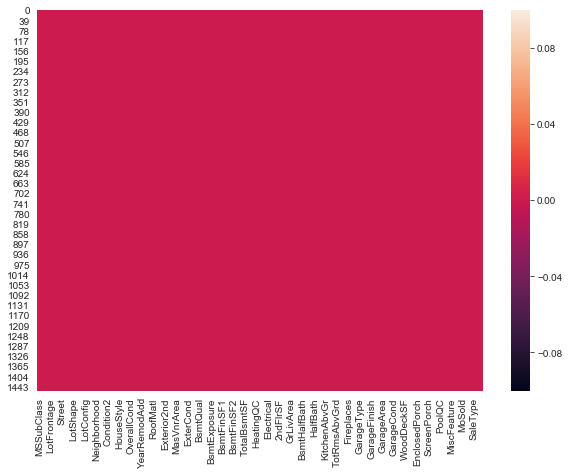

In [117]:
#Visualising missingnes
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(test_set.isnull())

No null values.

#### Label Encoding 

In [118]:
features = ('Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'FireplaceQu','BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'Neighborhood',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating', 'OverallCond')


from sklearn.preprocessing import LabelEncoder
for i in features:
    le = LabelEncoder()
    test_set[i] = le.fit_transform(test_set[i])
    

Selecting only those features that we determined useful above:

In [119]:
test_set = test_set.iloc[:,column_index]

#### Making Predictions 

In [121]:
predictions = model.predict(test_set.values)
print(predictions)

[11.64725419 11.95044904 11.99040027 ... 11.96703564 11.65004155
 12.30339376]


We had used log transform to normalize the data. The predictions are also in the log form. We need to inverse it.

In [122]:
# Y = np.log1p(X) just calculates Y = log(1+X)
# It follows that to reverse this you would do
# X = np.e**Y - 1
predictions = np.expm1(predictions)

In [123]:
#Creating submission data set in format required by Kaggle
submission = pd.DataFrame({'Id': test_set.iloc[:,0],'SalePrice':pd.Series(predictions)})
submission.to_csv('Result_submission.csv',index = False)

#### That's it! We did it. :)
#### We learnt a plenty, didn't we?  
#### Keep learning. Cheers!!!